In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

## Data Preparation

In [2]:
!unzip covid19-radiography-database.zip
!mv 'COVID-19 Radiography Database' data

Archive:  covid19-radiography-database.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (109).png  
  inflating: COV

  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (91).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (92).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (93).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (94).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (95).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (96).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (97).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (98).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (99).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19(134).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19(135).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19(136).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19(137).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19(138

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1020).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1021).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1022).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1023).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1024).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1025).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1026).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1027).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1028).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1029).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (103).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1030).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1031).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1032).png  
  inflating: COVID-19

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1246).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1247).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1248).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1249).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (125).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1250).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1251).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1252).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1253).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1254).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1255).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1256).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1257).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (1258).png  
  inflating: COVID-19

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (158).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (159).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (16).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (160).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (161).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (162).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (163).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (164).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (165).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (166).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (167).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (168).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (169).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (17).png  
  inflating: COVID-19 Radiography Da

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (277).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (278).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (279).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (28).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (280).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (281).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (282).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (283).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (284).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (285).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (286).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (287).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (288).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (289).png  
  inflating: COVID-19 Radiography D

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (384).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (385).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (386).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (387).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (388).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (389).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (39).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (390).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (391).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (392).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (393).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (394).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (395).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (396).png  
  inflating: COVID-19 Radiography D

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (491).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (492).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (493).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (494).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (495).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (496).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (497).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (498).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (499).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (5).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (50).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (500).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (501).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (502).png  
  inflating: COVID-19 Radiography Dat

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (61).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (610).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (611).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (612).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (613).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (614).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (615).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (616).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (617).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (618).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (619).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (62).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (620).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (621).png  
  inflating: COVID-19 Radiography Da

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (73).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (730).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (731).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (732).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (733).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (734).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (735).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (736).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (737).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (738).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (739).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (74).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (740).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (741).png  
  inflating: COVID-19 Radiography Da

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (848).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (849).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (85).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (850).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (851).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (852).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (853).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (854).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (855).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (856).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (857).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (858).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (859).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (86).png  
  inflating: COVID-19 Radiography Da

  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (967).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (968).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (969).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (97).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (970).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (971).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (972).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (973).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (974).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (975).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (976).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (977).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (978).png  
  inflating: COVID-19 Radiography Database/NORMAL/NORMAL (979).png  
  inflating: COVID-19 Radiography D

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1066).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1067).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1068).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1069).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (107).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1070).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1071).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1072).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1073).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1074).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1075).png  
  inflating: COVID-19 Radiography

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1153).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1154).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1155).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1156).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1157).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1158).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1159).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (116).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1160).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1161).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1162).png  
  inflating: COVID-19 Radiography

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1244).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1245).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1246).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1247).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1248).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1249).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (125).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1250).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1251).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1252).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1253).png  
  inflating: COVID-19 Radiography

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1332).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1333).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1334).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1335).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1336).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1337).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1338).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1339).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (134).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1340).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1341).png  
  inflating: COVID-19 Radiography

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (212).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (213).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (214).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (215).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (216).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (217).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (218).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (219).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (22).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (220).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (221).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (300).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (301).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (302).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (303).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (304).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (305).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (306).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (307).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (308).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (309).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (31).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (387).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (388).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (389).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (39).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (390).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (391).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (392).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (393).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (394).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (395).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (396).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (487).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (488).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (489).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (49).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (490).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (491).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (492).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (493).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (494).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (495).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (496).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (572).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (573).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (574).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (575).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (576).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (577).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (578).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (579).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (58).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (580).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (581).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (66).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (660).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (661).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (662).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (663).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (664).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (665).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (666).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (667).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (668).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (669).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (75).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (750).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (751).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (752).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (753).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (754).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (755).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (756).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (757).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (758).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (759).png  
  inflating: COVID-19 Radiography Database/V

  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (922).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (923).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (924).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (925).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (926).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (927).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (928).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (929).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (93).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (930).png  
  inflating: COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (931).png  
  inflating: COVID-19 Radiography Database/V

In [3]:
dirs = ['COVID-19', 'NORMAL', 'Viral Pneumonia']

for d in dirs:
    path = 'data/' + d + '/'
    for file in os.listdir(path):
        dst = file.replace('(', '_').replace(')', '').replace(' ', '')
        src = path + file 
        dst = path + dst
    
        os.rename(src, dst)
os.rename('data/Viral Pneumonia', 'data/PNEUMONIA')

In [4]:
covid = glob('data/COVID-19/*.png')
normal = glob('data/NORMAL/*.png')
pneumonia = glob('data/PNEUMONIA/*.png')

covid_train = covid[:160]
normal_train = normal[:160]
pneumonia_train = pneumonia[:160]

covid_val = covid[160:190]
normal_val = normal[160:190]
pneumonia_val = pneumonia[160:190]

covid_test = covid[190:]
normal_test = normal[190:400]
pneumonia_test = pneumonia[190:400]

In [5]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'
VAL_DIR = 'val'

!mkdir train
!mkdir train/COVID-19
!mkdir train/NORMAL
!mkdir train/PNEUMONIA

files = ' '.join(covid_train)
!mv -t train/COVID-19 $files

files = ' '.join(normal_train)
!mv -t train/NORMAL $files

files = ' '.join(pneumonia_train)
!mv -t train/PNEUMONIA $files

!mkdir test
!mkdir test/COVID-19
!mkdir test/NORMAL
!mkdir test/PNEUMONIA


files = ' '.join(covid_test)
!mv -t test/COVID-19 $files

files = ' '.join(normal_test)
!mv -t test/NORMAL $files

files = ' '.join(pneumonia_test)
!mv -t test/PNEUMONIA $files

!mkdir val
!mkdir val/COVID-19
!mkdir val/NORMAL
!mkdir val/PNEUMONIA


files = ' '.join(covid_val)
!mv -t val/COVID-19 $files

files = ' '.join(normal_val)
!mv -t val/NORMAL $files

files = ' '.join(pneumonia_val)
!mv -t val/PNEUMONIA $files

#### Plot some random images from the dataset.

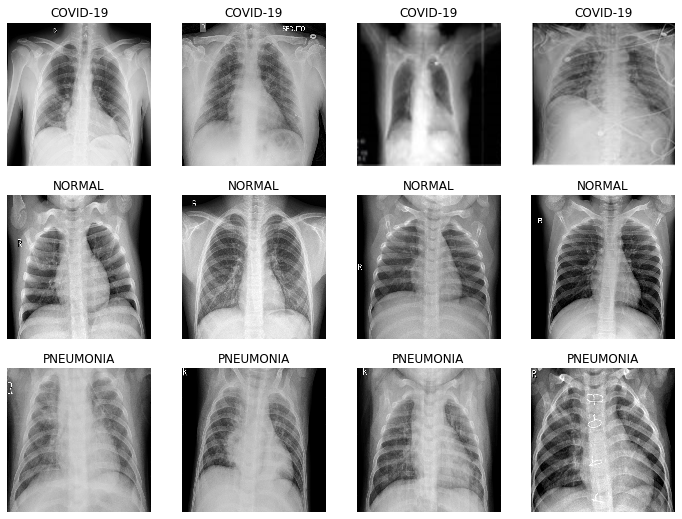

In [6]:
covids = np.random.choice(glob('train/COVID-19/*.png'), 4)
normals = np.random.choice(glob('train/NORMAL/*.png'), 4)
pneumonias = np.random.choice(glob('train/PNEUMONIA/*.png'), 4)
data = np.concatenate((covids, normals, pneumonias))
labels = 4 * ['COVID-19'] + 4 *['NORMAL'] + 4 *['PNEUMONIA']

N, R, C = 12, 3, 4
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

## Data Augmentation

In [7]:
CLASSES = 3
CHANNELS = 3

WIDTH = 224
HEIGHT = 224

TRAIN_DIR = 'train'
TEST_DIR = 'test'
VAL_DIR = 'val'

BATCH_SIZE = 32 
EPOCHS = 5

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 480 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [9]:
print(train_generator.class_indices)
classes = np.array(train_generator.classes)
(_ , occurences) = np.unique(classes, return_counts=True)
c = occurences[0]
n = occurences[1]
p = occurences[1]
total = c + n + p
print('Training covid cases: {}'.format(c))
print('Training normal cases: {}'.format(n))
print('Training pneumonia cases: {}'.format(p))
print('Training total cases: {}'.format(total))

{'COVID-19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
Training covid cases: 160
Training normal cases: 160
Training pneumonia cases: 160
Training total cases: 480


#### Plot some images result of data augmentation.

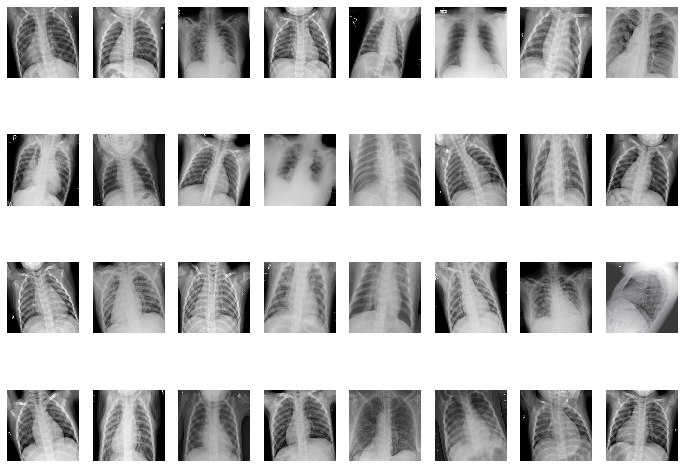

In [10]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

## Transfer Learning

In [11]:
pre_trained_model = InceptionV3(input_shape=(HEIGHT, WIDTH, CHANNELS), weights='imagenet', include_top=False) 

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(CLASSES, activation='softmax', activity_regularizer=l2(0.001))(x)
model = Model(inputs=pre_trained_model.input, outputs=predictions)

METRICS = [
    CategoricalAccuracy(name='accuracy'),
    AUC(name='auc')]

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=METRICS)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") >= 0.99):
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
callbacks = myCallback()

reduce_lr_acc = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.1, 
    patience=2, 
    verbose=1, 
    min_delta=1e-4, 
    mode='max')

earlyStopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=2, 
    verbose=1, 
    mode='max')

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[earlyStopping, reduce_lr_acc, callbacks],
    verbose=1)

Train for 15 steps, validate for 3 steps
Epoch 1/5
15/15 [==============================] - 55s 4s/step - loss: 1.4137 - accuracy: 0.7292 - auc: 0.8878 - val_loss: 1.6449 - val_accuracy: 0.6222 - val_auc: 0.8298
Epoch 2/5
15/15 [==============================] - 52s 3s/step - loss: 0.4212 - accuracy: 0.9125 - auc: 0.9647 - val_loss: 0.4730 - val_accuracy: 0.9000 - val_auc: 0.9683
Epoch 3/5
15/15 [==============================] - 52s 3s/step - loss: 0.2061 - accuracy: 0.9479 - auc: 0.9883 - val_loss: 0.4123 - val_accuracy: 0.8778 - val_auc: 0.9764
Epoch 4/5
15/15 [==============================] - 50s 3s/step - loss: 0.1956 - accuracy: 0.9542 - auc: 0.9890 - val_loss: 0.1659 - val_accuracy: 0.9556 - val_auc: 0.9916
Epoch 5/5
15/15 [==============================] - 52s 3s/step - loss: 0.1027 - accuracy: 0.9625 - auc: 0.9937 - val_loss: 0.1648 - val_accuracy: 0.9556 - val_auc: 0.9898


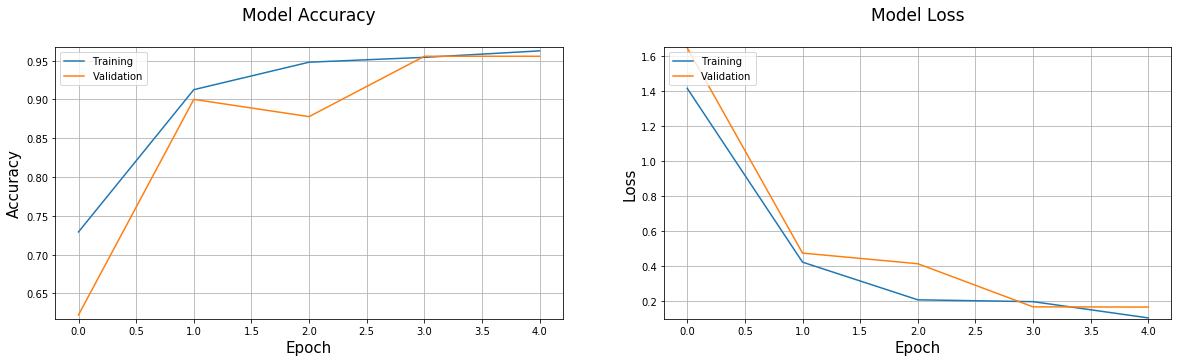

In [14]:
def plot_performance(history=None):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    ylim_pad = [0.005, 0.005]
    plt.figure(figsize=(20, 5))

    # Plot training & validation Accuracy values

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    # Plot training & validation loss values

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()
    
plot_performance(history=history)

## Performance Evaluation on the Test set

In [15]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

print(test_generator.class_indices)
classes = np.array(test_generator.classes)
(_ , occurences) = np.unique(classes, return_counts=True)
c = occurences[0]
n = occurences[1]
p = occurences[1]
total = c + n + p
print('Test covid cases: {}'.format(c))
print('Test normal cases: {}'.format(n))
print('Test pneumonia cases: {}'.format(p))
print('Test total cases: {}'.format(total))

Found 449 images belonging to 3 classes.
{'COVID-19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
Test covid cases: 29
Test normal cases: 210
Test pneumonia cases: 210
Test total cases: 449


In [16]:
results = model.evaluate(test_generator, steps=len(test_generator))
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

15/15 [==============================] - 14s 921ms/step - loss: 0.1748 - accuracy: 0.9310 - auc: 0.9905
loss :  0.17483547021790097
accuracy :  0.9309577
auc :  0.9904576


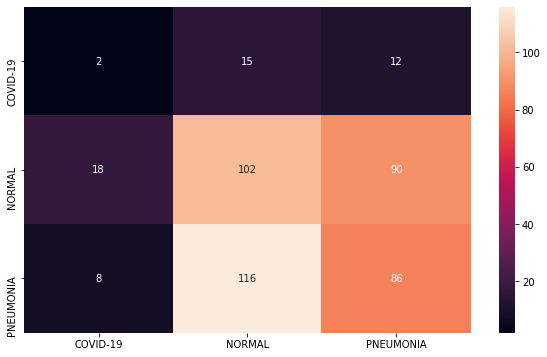

In [17]:
def plot_confusion_matrix(model):
    labels = ["COVID-19", "NORMAL", "PNEUMONIA"]
    predictions = model.predict_generator(test_generator, steps=len(test_generator))
    y_true = test_generator.classes
    y_pred = np.argmax(predictions, axis=1)
    cm =confusion_matrix(y_true, y_pred)    
    cm_df = pd.DataFrame(cm, columns=labels, index=labels)                      
    plt.figure(figsize=(10, 6))  
    sns.heatmap(cm_df, annot=True, fmt="d")
    plt.show()

plot_confusion_matrix(model)

## Prediction of the Custom Model

In [18]:
def predict(model, img):
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)

    return preds[0]

def plot_preds(img, preds):
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1, 2], preds, alpha=0.5)
    plt.yticks([0, 1, 2], ["COVID-19", "NORMAL", "PNEUMONIA"])
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

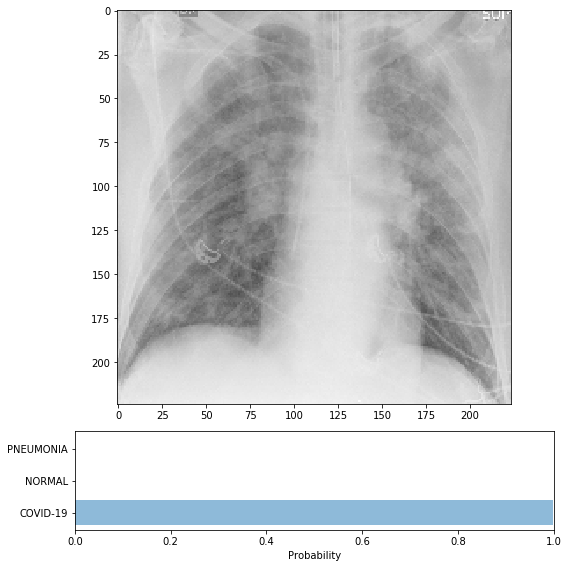

In [19]:
img = load_img('test/COVID-19/COVID-19_210.png', target_size=(HEIGHT, WIDTH))

preds = predict(model, img)

plot_preds(np.asarray(img), preds)